## Loading a United-atom cy5 representation into mbuild

In [1]:
import numpy as np
import mbuild as mb

/Users/stephaniemccallum/miniforge3/envs/mupt-analysis/lib/python3.12/site-packages/gmso/core/element.py:10: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import resource_filename


In [2]:
dye = mb.load('../data/CY5-bonds.pdb')
dye.visualize().show()

/Users/stephaniemccallum/miniforge3/envs/mupt-analysis/lib/python3.12/site-packages/mbuild/compound.py:546: UserWarning: Some particle of <Compound 58 particles, 61 bonds, non-periodic, id: 6114406720> does not have a charge.They will not be accounted for during this calculation.
  warn(


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

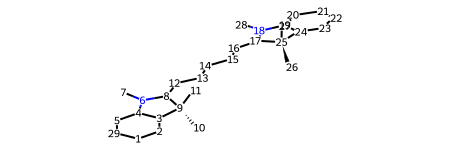

In [3]:
#use mbuild to remove carbon and hydrogen particles attatched to nitrogen linkers
from rdkit import Chem

def show_atom_number(mol, label):
    for atom in mol.GetAtoms():
        atom.SetProp(label, str(atom.GetIdx()+1))
    return mol
    
dye1 = Chem.MolFromPDBFile("../data/CY5-bonds.pdb",)
show_atom_number(dye1, 'atomLabel')
#add tether particle and bond
#fix tether particle position
#maybe restrict angle movement of bond or add surface

In [36]:
def remove_hydrogens(compound):
    """Removes atoms bonded to linker"""
    # Create a list of hydrogen atoms to be removed
    hydrogens_to_remove = [
        particle for particle in compound.particles() if particle.element.atomic_number == 1
    ]
    
    # Iterate and remove each hydrogen atom
    for particle in hydrogens_to_remove:
        compound.remove(particle)

    # Return the compound with hydrogens removed
    return compound

In [62]:
def remove_carbons_by_index(compound):
    """Removes atoms bonded to linker"""
    # Create a list of hydrogen atoms to be removed
    carbon_idx = ['C21','C22']
    carbons_to_remove = [
        particle for particle in compound.particles() if particle.name in carbon_idx
    ]
    
    for carbon in carbons_to_remove:
        compound.remove(carbon)

    # Return the compound with hydrogens removed
    return compound

In [63]:
uadye = remove_hydrogens(dye)
uadye = remove_carbons_by_index(uadye)

In [65]:
uadye.visualize().show()

/Users/stephaniemccallum/miniforge3/envs/mupt-analysis/lib/python3.12/site-packages/mbuild/compound.py:546: UserWarning: Some particle of <Compound 27 particles, 30 bonds, non-periodic, id: 11278839168> does not have a charge.They will not be accounted for during this calculation.
  warn(


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

## Loading cy5 into flowerMD Molecule

In [3]:
from flowermd.base import Molecule, System

In [5]:
dye = Molecule(num_mols=2,file='../data/CY5-bonds.pdb')

In [8]:
print(dye,dye.molecules)

<flowermd.base.molecule.Molecule object at 0x297bf5640> [<Compound 58 particles, 61 bonds, non-periodic, id: 11098527920>, <Compound 58 particles, 61 bonds, non-periodic, id: 11132975488>]


## make a molecule class that add tethers to the linker sites and removes hydrogens for UA model

TODO: write an initialization class based on system where we can control the placement of the dyes in a box.

make each dye a rigid body from snapshot

apply forcefield and exclude tether particles

maybe: add wall and wall potential to restrict rotation of dyes